# EO-HARVEST
## Demonstration with Ifremer Opensearch Service for CCI products

Ifremer Opensearch service (https://opensearch.ifremer.fr/) allows to search and select Satellite and In Situ data over space and time criteria. It offers in particular search capabilities for various satellite products. No account is required.

``eo-harvest`` is a search API able to query different web search services, without messing with URL construction and decoding of XML or json results. It returns the found granules (files) as a list of python objects.

On how to install and use ``eo-harvest`` refer to: https://gitlab.ifremer.fr/naiad/eo_harvest/

In [1]:
# import eo-harvest package
import eo_harvest

# and other stuff
import datetime
import shapely.geometry


ERROR 1: PROJ: proj_create_from_database: Open of /home/jfpiolle/miniconda3/envs/naiad/share/proj failed


### Simple search
Searching granule files for a dataset using time and space criteria. Some of the currently accessible CCI Sea State products include:

* L2P v3 for Jason-1 : `cciseastate_l2p_alt_jason_1`
* L2P v3 for Jason-2 : `cciseastate_l2p_alt_jason_2`
* L2P v3 for Jason-3 : `cciseastate_l2p_alt_jason_3`
* L2P v3 for Cryosat-2 : `cciseastate_l2p_alt_cryosat_2`
* L2P v3 for ENVISAT : `cciseastate_l2p_alt_envisat`
* L2P v3 for SARAL : `cciseastate_l2p_alt_saral`
* L2P v3 for Sentinel-3 A : `cciseastate_l2p_alt_sentinel_3a`


Let's search for instance L2P for Jason-3 dataset, whose id is `cciseastate_l2p_alt_jason_3`.



In [16]:
# define search area as shapely geometry (here a simple rectangular box: lon min, lat min, lon max, lat max)
area = shapely.geometry.box(-100, -20, -20, 20)

# define search time frame
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 1, 2)

# performs the search
# first args is the data store, here `Ifremer`
res = eo_harvest.search_granule(
    'Ifremer',
    'cciseastate_l2p_alt_jason_3',
    start,
    end,
    area,
)


## Inspecting the result

We get in ``res`` variable the list of granules, with their properties, that were returned by the query. A few operations can be done on these results.

### Display result footprints

It is possible to display the location of these found granules using ``plot`` function:

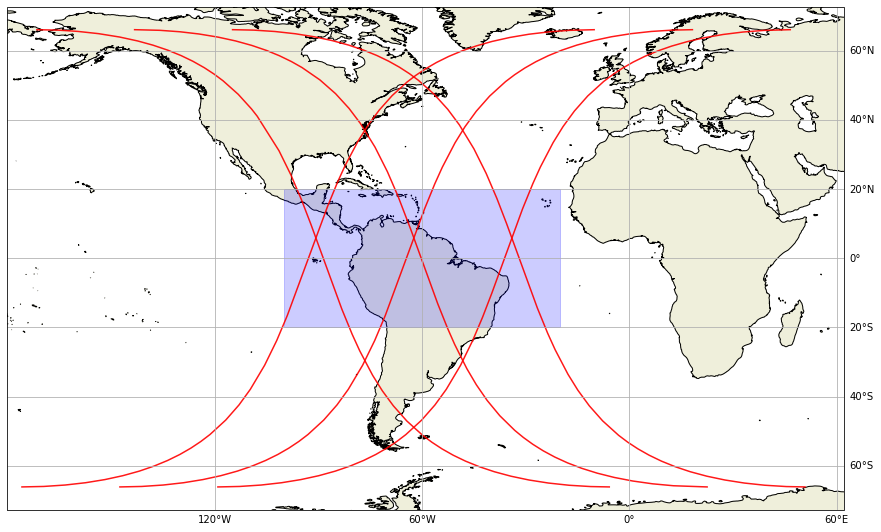

In [17]:
# display the location of found granules
eo_harvest.plot(res, clip=area)

### Description of the returned granules

The properties of the returned granules can be inspected, just printing the returned granule objects. Note that different protocols (and therefore URLs) are available to actually download granules.

In [18]:
# display the details of the first granule in the returned list
print(res.items[0])

ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T082754-fv01.nc
   start: 2020-01-01 08:27:54
   end: 2020-01-01 09:24:07
   footprint: LINESTRING (-143.140625 66.1494140625, -135.822265625 65.9638671875, -130.05859375 65.5478515625, -124.541015625 64.908203125, -118.9755859375 63.9931640625, -113.94140625 62.896484375, -109.2578125 61.6015625, -104.9345703125 60.126953125, -101.2255859375 58.603515625, -97.7744140625 56.9306640625, -94.6962890625 55.1904296875, -89.533203125 51.6259765625, -84.99609375 47.6376953125, -81.091796875 43.3662109375, -77.802734375 39.0107421875, -73.5830078125 32.171875, -69.998046875 25.0654296875, -66.912109375 17.9306640625, -63.1923828125 8.2373046875, -55.4453125 -13.1083984375, -52.6015625 -20.2109375, -50.5224609375 -24.9306640625, -47.0126953125 -31.9228515625, -44.271484375 -36.5732421875, -41.1318359375 -41.1259765625, -37.47265625 -45.548828125, -33.1357421875 -49.798828125, -30.650390625 -51.83984375, -27.9150390625 -53.8134765625, -24.8955078125 -55.7

In [19]:
# print the name and URL (for local network access: 'DATARMOR GPFS') of all found granules
for c in res.items:
    print(c.name)
    print('URL: ', c.url['DATARMOR GPFS'])
    print()

ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T082754-fv01.nc
URL:  /home/datawork-cersat-public/provider/cci_seastate/products/v3/data/satellite/altimeter/l2p/jason-3/2020/001/ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T082754-fv01.nc

ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T203841-fv01.nc
URL:  /home/datawork-cersat-public/provider/cci_seastate/products/v3/data/satellite/altimeter/l2p/jason-3/2020/001/ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T203841-fv01.nc

ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T063528-fv01.nc
URL:  /home/datawork-cersat-public/provider/cci_seastate/products/v3/data/satellite/altimeter/l2p/jason-3/2020/001/ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T063528-fv01.nc

ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T184616-fv01.nc
URL:  /home/datawork-cersat-public/provider/cci_seastate/products/v3/data/satellite/altimeter/l2p/jason-3/2020/001/ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T184616-fv01.nc

ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T223107-fv01.nc
URL:  /home/datawork-cersat-publ

## Quicklook

Quicklooks are currently not available on Ifremer store.

## Download

Each returned granule (in ``res.items`` list) can be downloaded (``wget`` is used behind the scene), calling the ``download`` method on the granule to download. Main argument, ``mystore`` is the root folder where to save the downloaded granule: it will be saved in a subfolder ``<store>/<product identifier>/<year>/<day>/``. 

The access to CCI Sea State products is free and open, and no login or password is required; the only protocol is HTTPS (no FTP possible).



In [20]:
res.items[2].download(mystore='.', protocol='HTTPS')

--2023-02-23 12:03:29--  https://dap.ceda.ac.uk/neodc/esacci/sea_state/data/v3_release/altimeter/l2p/jason-3/v3.0/2020/01/01/ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T063528-fv01.nc
Résolution de dap.ceda.ac.uk (dap.ceda.ac.uk)… 130.246.128.117
Connexion à dap.ceda.ac.uk (dap.ceda.ac.uk)|130.246.128.117|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 384833 (376K) [application/octet-stream]
Enregistre : «Ifremer/cciseastate_l2p_alt_jason_3/2020/001/ESACCI-SEASTATE-L2P-SWH-Jason-3-20200101T063528-fv01.nc»

     0K .......... .......... .......... .......... .......... 13%  583K 1s
    50K .......... .......... .......... .......... .......... 26%  657K 0s
   100K .......... .......... .......... .......... .......... 39%  669K 0s
   150K .......... .......... .......... .......... .......... 53%  271K 0s
   200K .......... .......... .......... .......... .......... 66% 1,22M 0s
   250K .......... .......... .......... .......... .......... 79%  592K 0s


True

Of course you can download the data directly using the list of URLs as listed in previous step. This is safer and recommended for a large number of files, and you can use your favorite download tool.